# Network inference for non-sequential data

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import simulate
import inference
%matplotlib inline

np.random.seed(1)

In [2]:
# parameter setting:
n = 20     # number of variables
g = 2.0    # coupling variability parameter

We generate actual interaction matrix `w0` and external local field `h0`.

In [3]:
w0 = simulate.generate_interactions(n,g)

In [4]:
h0 = np.random.normal(0.0,g/np.sqrt(n),size=n)

Generate non-sequential data `s` based on `w0` and `h0`.

In [5]:
l = 4*(n**2)
s = simulate.generate_data(w0,h0,l)

Infer network interaction and external local field.

In [6]:
w_infer,h0_infer = inference.fit_interaction(s)

Compare actual values and inferred values.

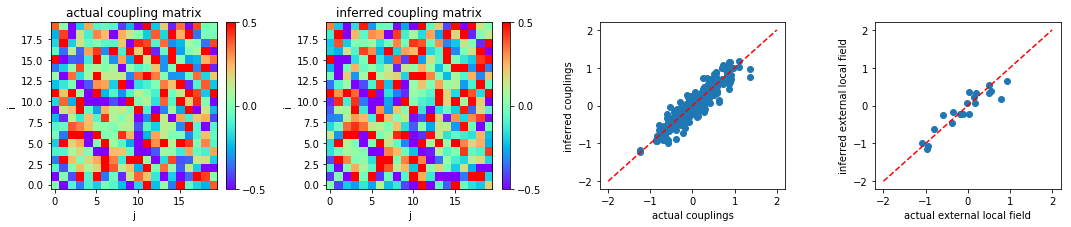

In [7]:
plt.figure(figsize=(15,3.2))

plt.subplot2grid((1,4),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,4),(0,1))
plt.title('inferred coupling matrix')
plt.imshow(w_infer,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,4),(0,2))
plt.plot([-2,2],[-2,2],'r--')
plt.scatter(w0,w_infer)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.subplot2grid((1,4),(0,3))
plt.plot([-2,2],[-2,2],'r--')
plt.scatter(h0,h0_infer)
plt.xlabel('actual external local field')
plt.ylabel('inferred external local field')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()